# EDA (Exploratory Data Analysis)
Look at the features in the training data, see how they correlate with each other and the target variable (asking price). This will help inform which features to use or engineer for the model.

In [71]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# increase cell width
from IPython.display import HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [3]:
DATA_FOLDER = os.path.join('data', 'final')
SAVE_FOLDER = os.path.join('data', 'final')

Read in our training dataset

In [4]:
zoopla_df_train = pd.read_csv(os.path.join(DATA_FOLDER, 'zoopla_train.csv'), dtype=str)

Look at unique values and null values

In [5]:
# unique values
zoopla_df_train.nunique()

listing_id                                 619
parish                                       9
post_town                                    5
postcode                                    18
latitude                                   556
longitude                                  565
num_bedrooms                                 8
num_bathrooms                                6
price                                      186
property_type_general                        8
CURRENT_ENERGY_RATING_mode                   5
POTENTIAL_ENERGY_RATING_mode                 4
TOTAL_FLOOR_AREA_median                    214
NUMBER_HABITABLE_ROOMS_mode                  8
CONSTRUCTION_AGE_BAND_mode                  12
Index of Multiple Deprivation Decile        10
Income Decile                               10
Employment Decile                           10
Education and Skills Decile                 10
Health and Disability Decile                10
Crime Decile                                10
Barriers to H

In [6]:
# value counts for each variable
for col in zoopla_df_train.columns:
    display(zoopla_df_train[col].value_counts(dropna=False))

62823261    1
62586895    1
61991252    1
62146678    1
63531052    1
           ..
63829046    1
62384445    1
63806611    1
62079905    1
62414671    1
Name: listing_id, Length: 619, dtype: int64

Nuneaton and Bedworth, unparished area    408
Hinckley and Bosworth, unparished area    186
Burbage                                    11
Stoke Golding                               7
Witherley                                   2
Higham on the Hill                          2
Earl Shilton                                1
Sheepy                                      1
Nailstone                                   1
Name: parish, dtype: int64

Nuneaton      412
Hinckley      196
Bedworth        6
Atherstone      4
Derby           1
Name: post_town, dtype: int64

LE10 0    121
CV11 6     91
CV10 9     69
CV10 0     63
LE10 1     62
CV10 7     51
CV11 4     46
CV10 8     39
CV11 5     25
CV11 7     16
CV13 6     10
LE10 2      8
CV12 9      7
LE10 3      6
CV9 3       2
CV12 8      1
LE9 7       1
CV13 0      1
Name: postcode, dtype: int64

52.537514             17
52.52016999999999      9
52.543385              7
52.513065000000005     4
52.5285                3
                      ..
52.519703              1
52.549988              1
52.535778              1
52.520126              1
52.53529               1
Name: latitude, Length: 556, dtype: int64

-1.434415              17
-1.4552873              9
-1.447905               7
-1.493124               4
-1.519784               3
                       ..
-1.470331               1
-1.4609219999999998     1
-1.386379               1
-1.380469               1
-1.5155049999999999     1
Name: longitude, Length: 565, dtype: int64

3    281
2    153
4    140
5     21
1     15
0      5
7      2
6      2
Name: num_bedrooms, dtype: int64

1    349
2    172
0     46
3     44
4      7
6      1
Name: num_bathrooms, dtype: int64

260000.0    25
250000.0    21
300000.0    19
240000.0    18
220000.0    18
            ..
439950.0     1
699995.0     1
800000.0     1
233500.0     1
63000.0      1
Name: price, Length: 186, dtype: int64

Detached house         199
Semi-detached house    172
Terraced house         100
Flat                    52
End terrace house       34
Bungalow                33
Other/Unknown           26
Maisonette               3
Name: property_type_general, dtype: int64

4.0    246
3.0    119
2.0    109
NaN     95
5.0     45
6.0      5
Name: CURRENT_ENERGY_RATING_mode, dtype: int64

2.0    329
3.0    110
NaN     95
1.0     77
4.0      8
Name: POTENTIAL_ENERGY_RATING_mode, dtype: int64

NaN      95
84.0     12
77.0     12
96.0     11
70.0     11
         ..
70.24     1
81.5      1
99.5      1
165.5     1
137.0     1
Name: TOTAL_FLOOR_AREA_median, Length: 215, dtype: int64

NaN    192
5.0    144
4.0    113
3.0     65
6.0     53
7.0     29
2.0     12
8.0      7
9.0      4
Name: NUMBER_HABITABLE_ROOMS_mode, dtype: int64

NaN     162
2.0      72
5.0      64
3.0      50
4.0      47
10.0     37
7.0      36
12.0     36
9.0      32
6.0      25
8.0      24
1.0      21
11.0     13
Name: CONSTRUCTION_AGE_BAND_mode, dtype: int64

8      157
6       68
4       62
3       62
5       55
10      53
9       45
1       40
2       31
7       26
NaN     20
Name: Index of Multiple Deprivation Decile, dtype: int64

9      124
7      107
5       83
4       67
3       46
10      42
8       36
2       34
6       32
1       28
NaN     20
Name: Income Decile, dtype: int64

6      125
8      103
9       87
4       68
3       62
2       49
7       38
5       33
1       29
NaN     20
10       5
Name: Employment Decile, dtype: int64

5      98
3      97
4      93
8      89
1      64
2      52
9      44
7      33
6      21
NaN    20
10      8
Name: Education and Skills Decile, dtype: int64

5      100
7       97
4       82
6       77
9       63
3       58
2       49
8       41
NaN     20
10      17
1       15
Name: Health and Disability Decile, dtype: int64

4      106
6       98
7       84
3       61
8       53
1       50
5       45
9       41
2       40
10      21
NaN     20
Name: Crime Decile, dtype: int64

4      112
8       98
9       97
7       86
3       67
10      62
5       35
6       25
NaN     20
1       17
Name: Barriers to Housing and Services Decile, dtype: int64

6      121
9       92
10      85
4       80
8       52
5       48
2       46
7       37
3       31
NaN     20
1        7
Name: Living Environment Decile, dtype: int64

8      96
9      90
5      85
4      67
6      65
7      59
3      41
1      39
2      31
10     26
NaN    20
Name: IDACI Decile, dtype: int64

9      110
5       90
8       88
6       80
4       57
7       55
10      45
2       31
1       23
3       20
NaN     20
Name: IDAOPI Decile, dtype: int64

None      576
NaN        30
Medium      8
Low         5
Name: PROB_4BAND, dtype: int64

0     274
1      95
2      80
3      58
4      36
5      29
7      16
6      11
9       5
10      5
8       2
12      2
11      2
16      1
14      1
27      1
18      1
Name: diff_published_date, dtype: int64

2023    423
2022    196
Name: last_published_year, dtype: int64

1     301
2     122
11     83
12     48
10     38
9      15
8      10
6       1
5       1
Name: last_published_month, dtype: int64

2022    435
2023    178
2021      5
2020      1
Name: first_published_year, dtype: int64

1     155
10     95
11     93
9      79
8      50
12     48
7      35
2      28
6      15
3       9
5       6
4       6
Name: first_published_month, dtype: int64

Later we will set null values in numeric values to 0 (with a new column that is a flag (bool) if the value is null). We will also apply caps and aggregate some values to remove rare values or values that are in the test set but not the training set.

listing_id                                  0.000000
parish                                      0.000000
post_town                                   0.000000
postcode                                    0.000000
latitude                                    0.000000
longitude                                   0.000000
num_bedrooms                                0.000000
num_bathrooms                               0.000000
price                                       0.000000
property_type_general                       0.000000
CURRENT_ENERGY_RATING_mode                 15.347334
POTENTIAL_ENERGY_RATING_mode               15.347334
TOTAL_FLOOR_AREA_median                    15.347334
NUMBER_HABITABLE_ROOMS_mode                31.017771
CONSTRUCTION_AGE_BAND_mode                 26.171244
Index of Multiple Deprivation Decile        3.231018
Income Decile                               3.231018
Employment Decile                           3.231018
Education and Skills Decile                 3.

<AxesSubplot:>

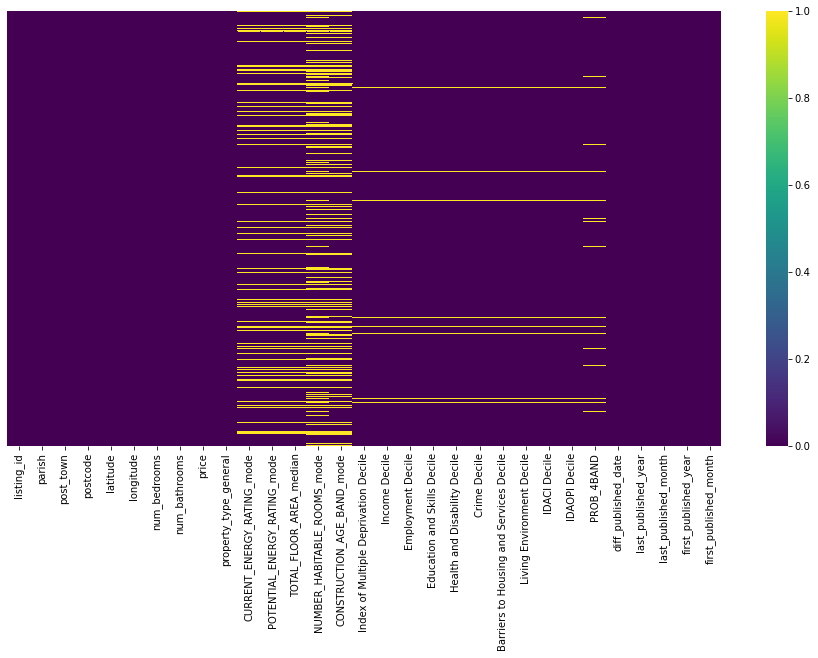

In [7]:
# null values (as a percentage of all records and as a heatmap)
display(100*zoopla_df_train.isnull().sum()/len(zoopla_df_train))
plt.figure(figsize=(16,8))
sns.heatmap(zoopla_df_train.isnull(), cmap='viridis', yticklabels=False)

### Separate out into numeric and categoric columns

In [8]:
numeric_cols = ['latitude', 'longitude', 'num_bedrooms', 'num_bathrooms', 'CURRENT_ENERGY_RATING_mode',
       'POTENTIAL_ENERGY_RATING_mode', 'TOTAL_FLOOR_AREA_median', 'CONSTRUCTION_AGE_BAND_mode',
       'Index of Multiple Deprivation Decile', 'Income Decile',
       'Employment Decile', 'Education and Skills Decile',
       'Health and Disability Decile', 'Crime Decile',
       'Barriers to Housing and Services Decile', 'Living Environment Decile',
       'IDACI Decile', 'IDAOPI Decile', 'diff_published_date',
       'last_published_year', 'last_published_month', 'first_published_year',
       'first_published_month', 'price']
zoopla_df_train[numeric_cols] = zoopla_df_train[numeric_cols].astype(float)

In [69]:
categoric_cols = ['post_town', 'parish', 'postcode', 'PROB_4BAND', 'property_type_general']

### Numeric column plots

#### Correlation Plots

<AxesSubplot:>

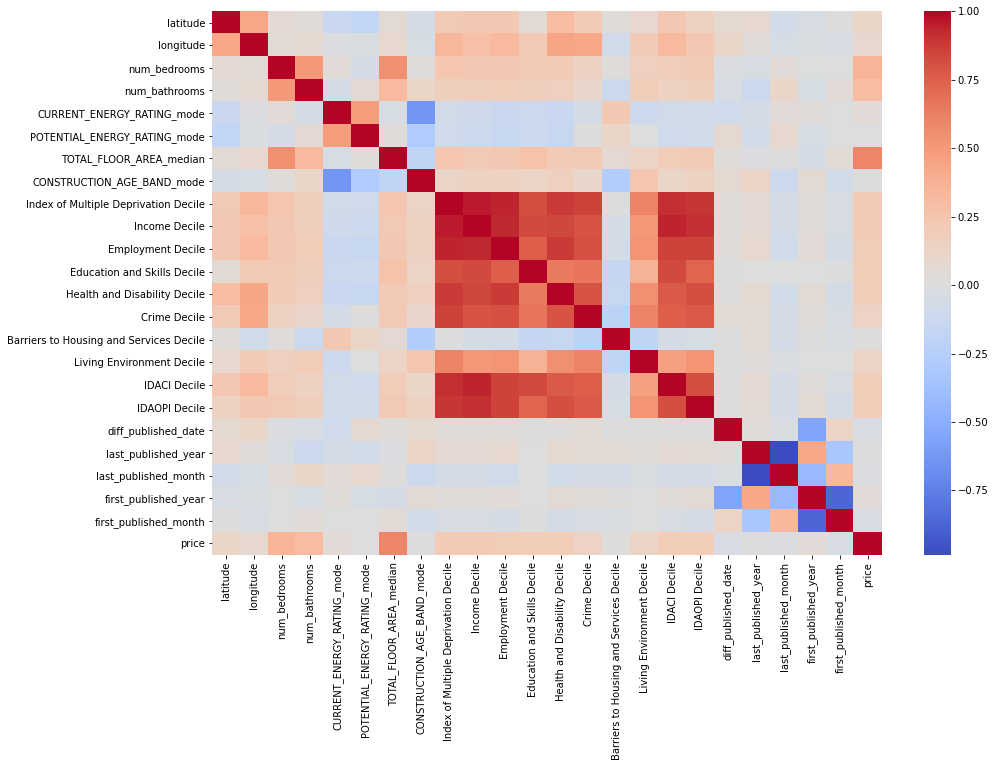

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(zoopla_df_train[numeric_cols].corr(), cmap='coolwarm')

Can see the income, employment, education, crime etc variables are highly positively correlated. Construction age band and EPC are negatively correlated. Let's look in more detail at these.

Look at individual plots in more detail.

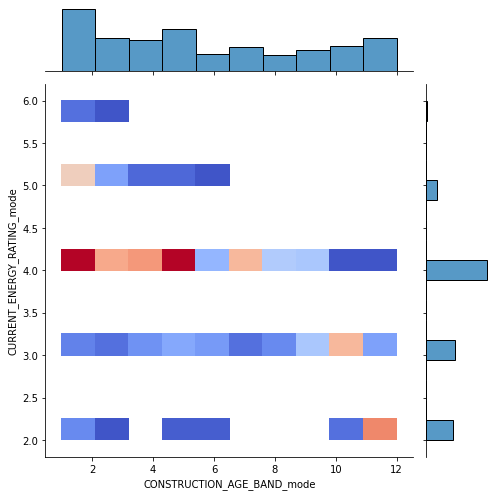

In [11]:
# construction age vs EPC. Higher EPC number means worse rating. Higher construction age band means more recent.
sns.jointplot(x=zoopla_df_train['CONSTRUCTION_AGE_BAND_mode'], y=zoopla_df_train['CURRENT_ENERGY_RATING_mode'], kind='hist', cmap='coolwarm', height=7)

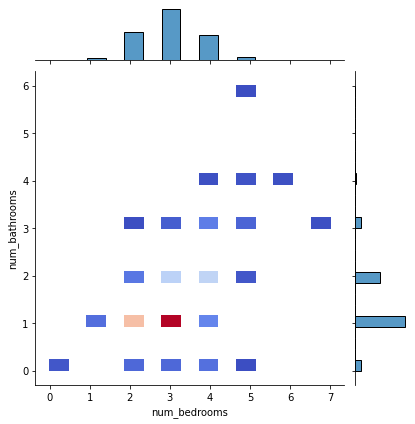

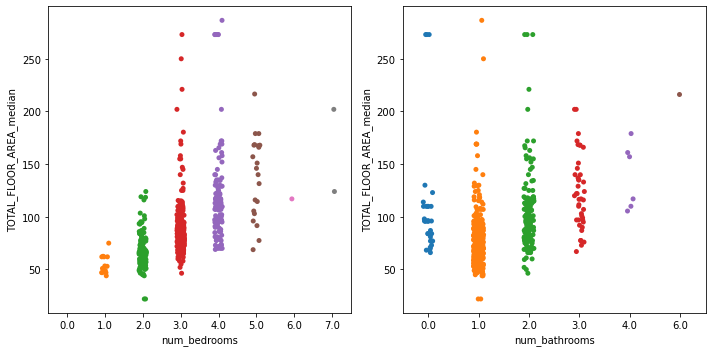

In [35]:
# number bedrooms, number bathrooms and total floor area
sns.jointplot(x=zoopla_df_train['num_bedrooms'], y=zoopla_df_train['num_bathrooms'], kind='hist', cmap='coolwarm')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.stripplot(x=zoopla_df_train['num_bedrooms'], y=zoopla_df_train['TOTAL_FLOOR_AREA_median'], ax=ax[0])
sns.stripplot(x=zoopla_df_train['num_bathrooms'], y=zoopla_df_train['TOTAL_FLOOR_AREA_median'], ax=ax[1])
plt.tight_layout()

/home/robertv/anaconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/robertv/anaconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_bathrooms', ylabel='count'>

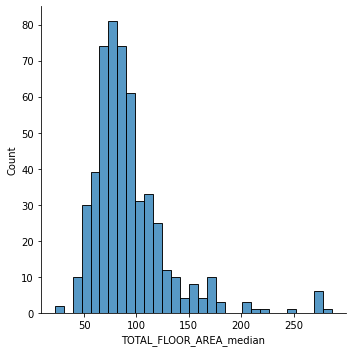

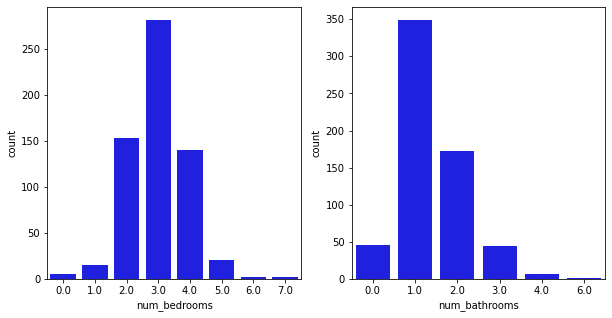

In [82]:
# 1D plots of total floor area, num bedrooms and bathrooms

sns.displot(zoopla_df_train['TOTAL_FLOOR_AREA_median'])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(zoopla_df_train['num_bedrooms'], ax=ax[0], color='b')
sns.countplot(zoopla_df_train['num_bathrooms'], ax=ax[1], color='b')

In [ ]:
sns.scatterplot()

#### See how each varaiable depends on the target variable, price

Correlation between numeric variables and target

<AxesSubplot:>

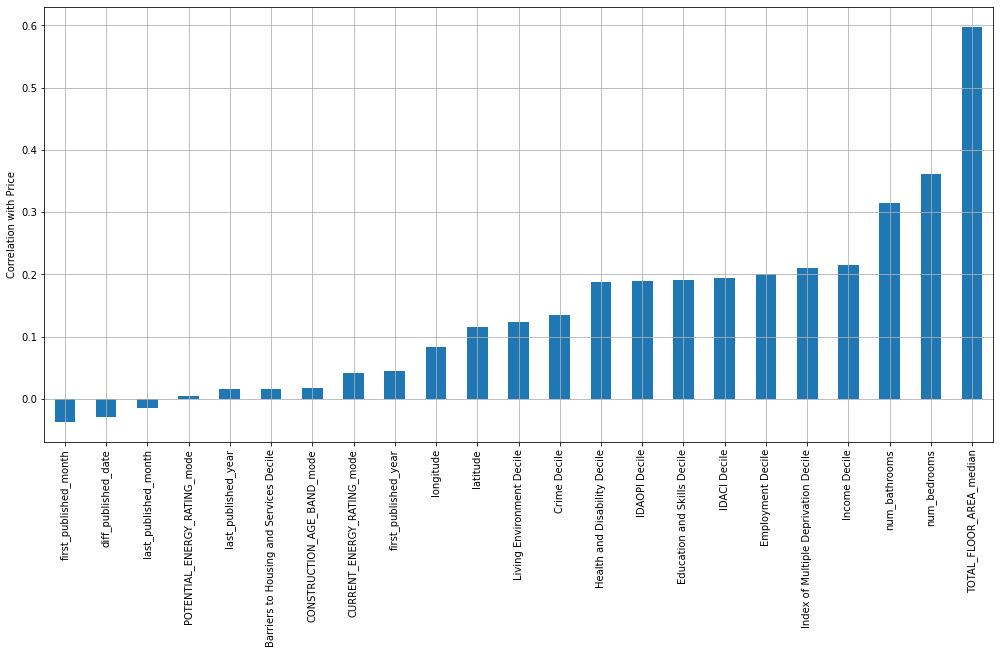

In [44]:
plt.figure(figsize=(17, 8))
display(zoopla_df_train[numeric_cols].astype(float).corr()[:-1]['price'].sort_values().plot(kind='bar'))
plt.ylabel('Correlation with Price')
plt.grid()

Look at some of these in more detail

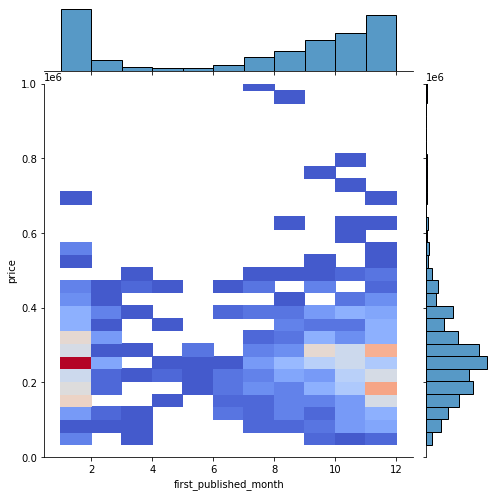

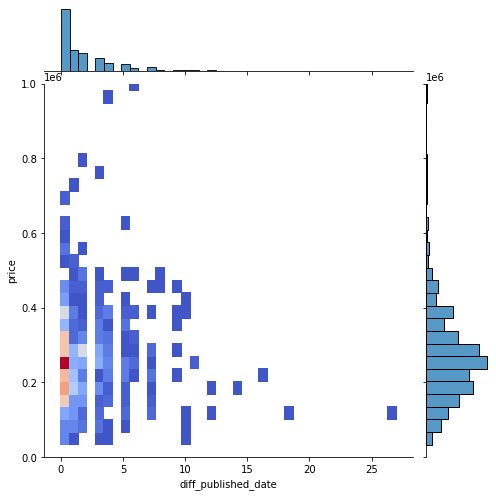

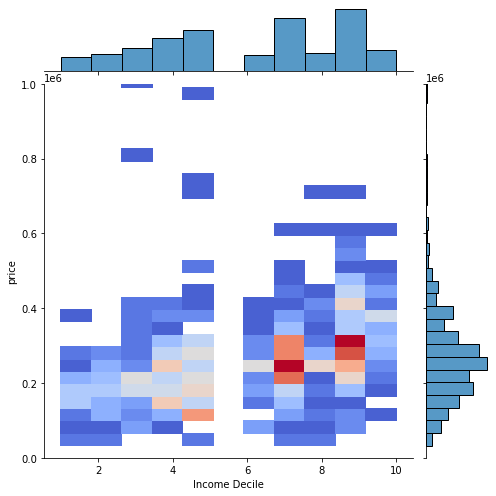

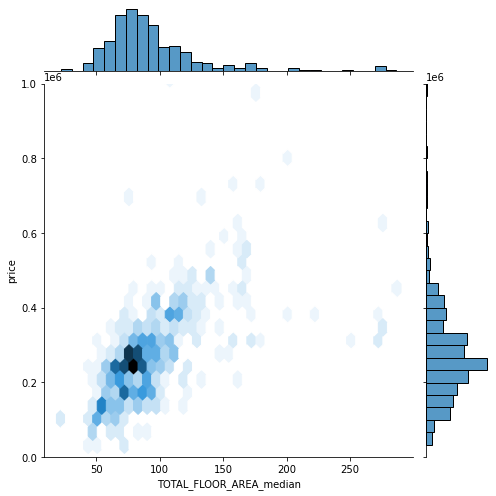

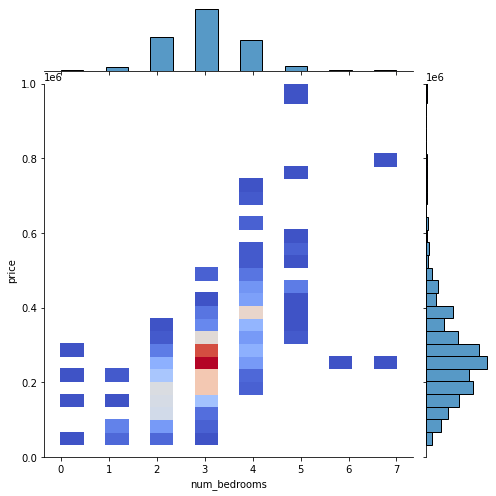

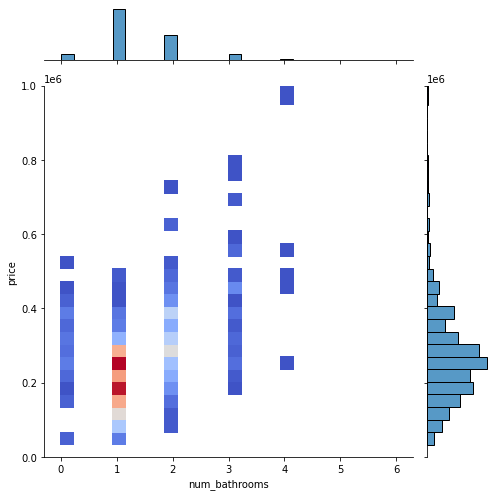

In [68]:
sns.jointplot(x=zoopla_df_train['first_published_month'], y=zoopla_df_train['price'], kind='hist', cmap='coolwarm', height=7, ylim=(0,1000000))
sns.jointplot(x=zoopla_df_train['diff_published_date'], y=zoopla_df_train['price'], kind='hist', cmap='coolwarm', height=7, ylim=(0,1000000))
sns.jointplot(x=zoopla_df_train['Income Decile'], y=zoopla_df_train['price'], kind='hist', cmap='coolwarm', height=7, ylim=(0,1000000))

sns.jointplot(x=zoopla_df_train['TOTAL_FLOOR_AREA_median'], y=zoopla_df_train['price'], kind='hex', height=7, ylim=(0,1000000))
sns.jointplot(x=zoopla_df_train['num_bedrooms'], y=zoopla_df_train['price'], kind='hist', cmap='coolwarm', height=7, ylim=(0,1000000))
sns.jointplot(x=zoopla_df_train['num_bathrooms'], y=zoopla_df_train['price'], kind='hist', cmap='coolwarm', height=7, ylim=(0,1000000))
plt.tight_layout()

### Categoric column plots

In [12]:
def plot_graph(x_col, y_col, kind, ylim, var_order=None):
    
    """
    Create 2D plots of x vs y, where the kind of plot can be specificed, maximum y limit and order
    from left to right of the x variable values
    """
    
    fig = plt.figure(figsize=(17,10))
    
    if kind == 'scatter':
        sns.scatterplot(x=x_col, y=y_col)
    elif kind == 'violin':
        sns.violinplot(x=x_col, y=y_col, order=var_order)
    elif kind == 'box':
        sns.boxplot(x=x_col, y=y_col, order=var_order)
    
    plt.ylim((0, ylim))
    plt.xlabel(col.title(), fontsize=15)
    plt.xticks(fontsize=14, rotation=90)
    plt.ylabel('Price', fontsize=15)
    plt.xticks(fontsize=14)
    plt.tight_layout()
    

<ipython-input-12-617539f5023c>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(17,10))


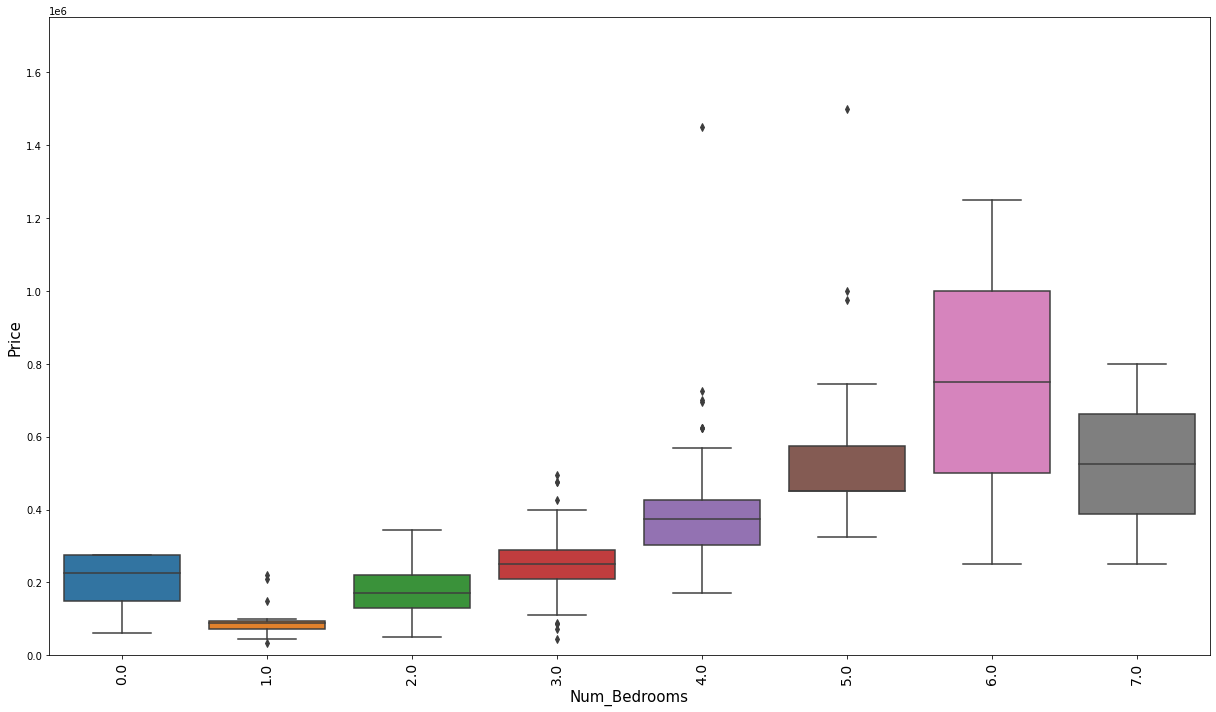

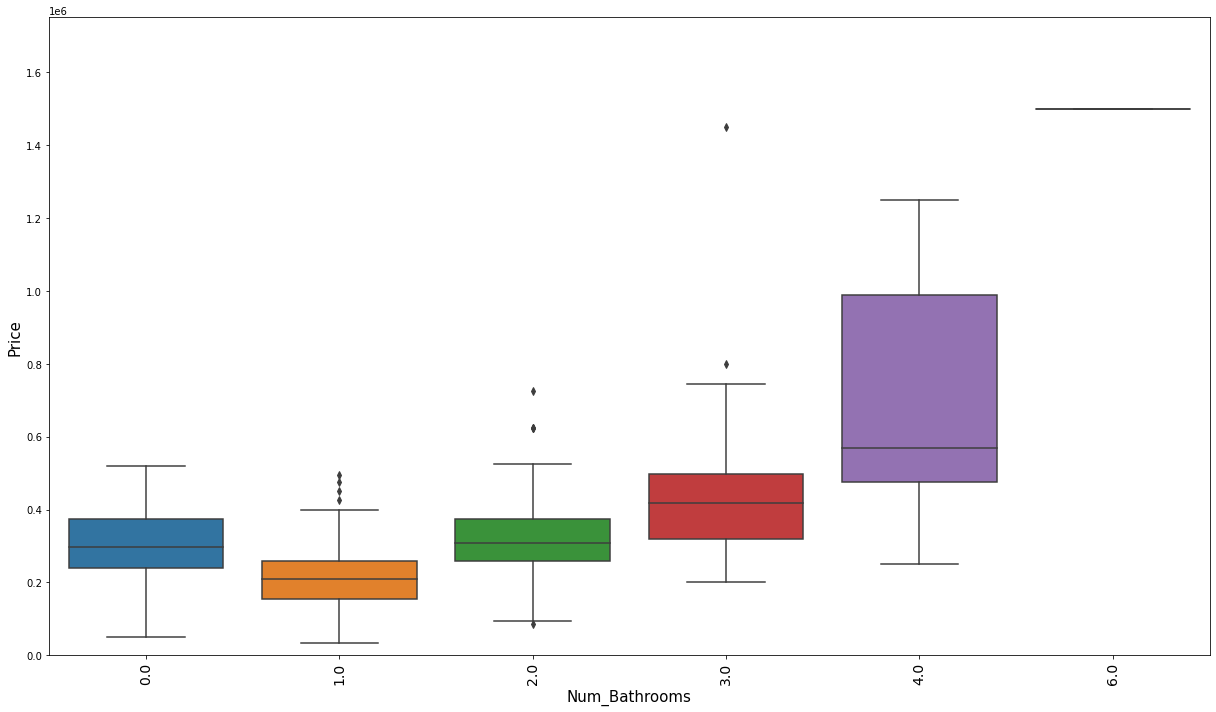

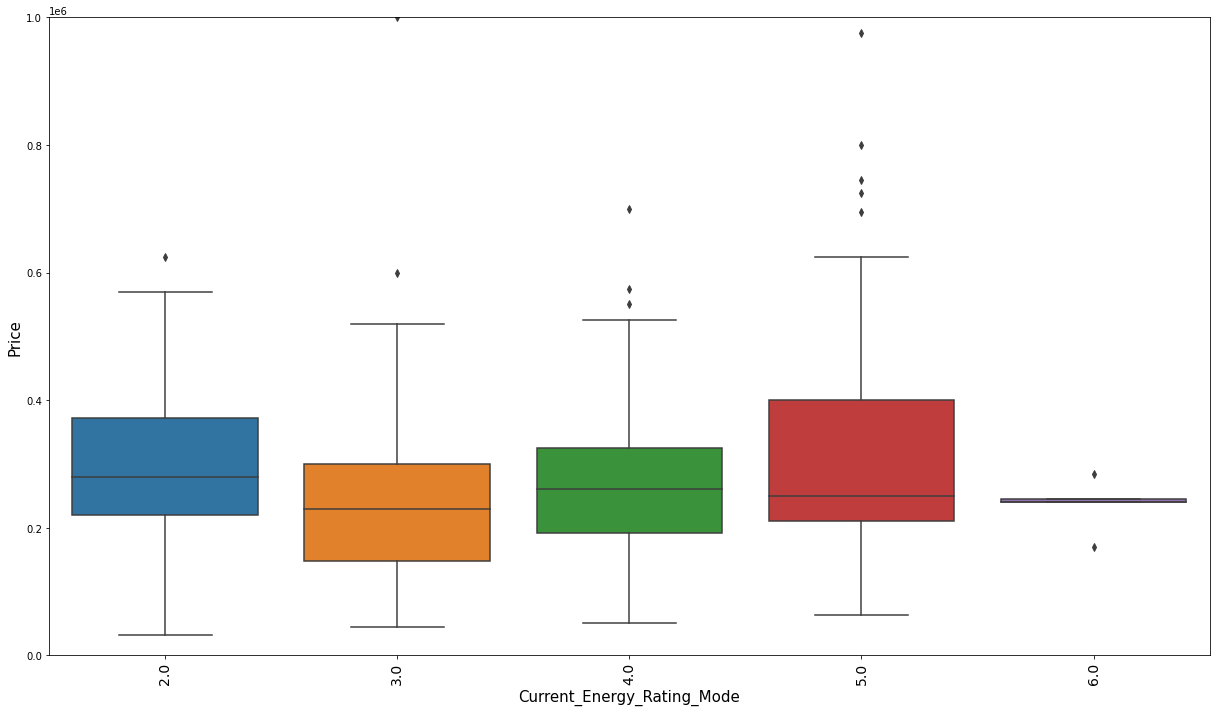

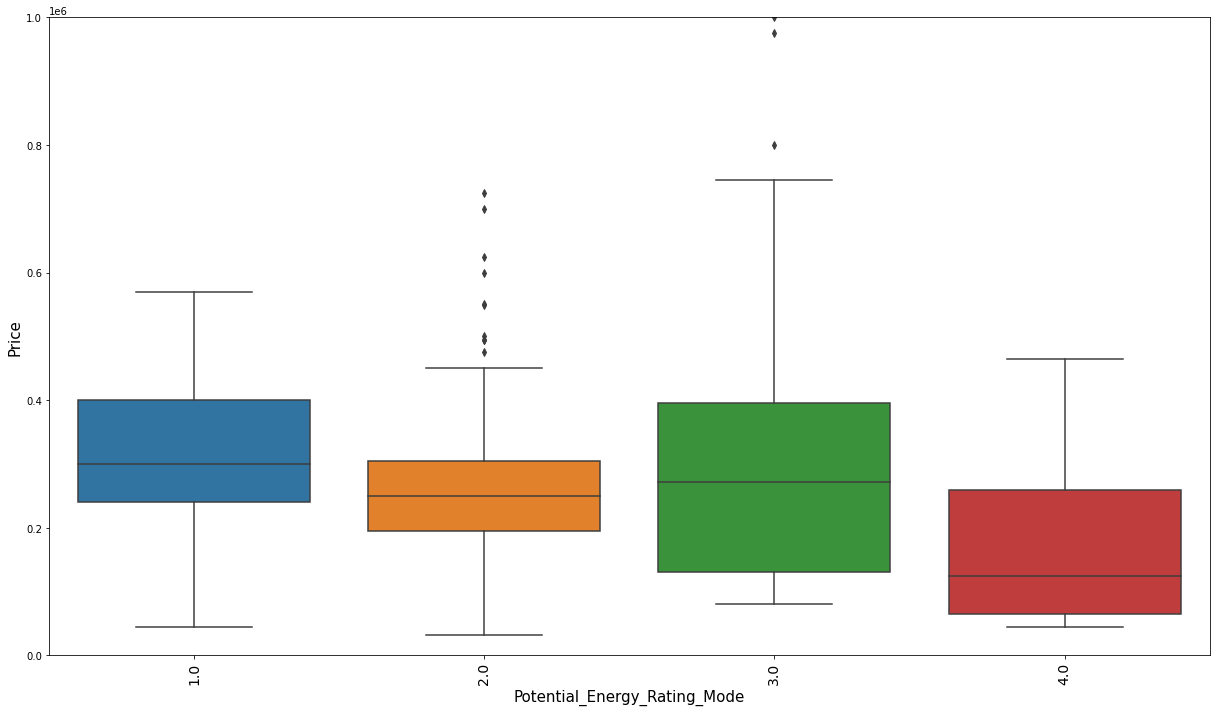

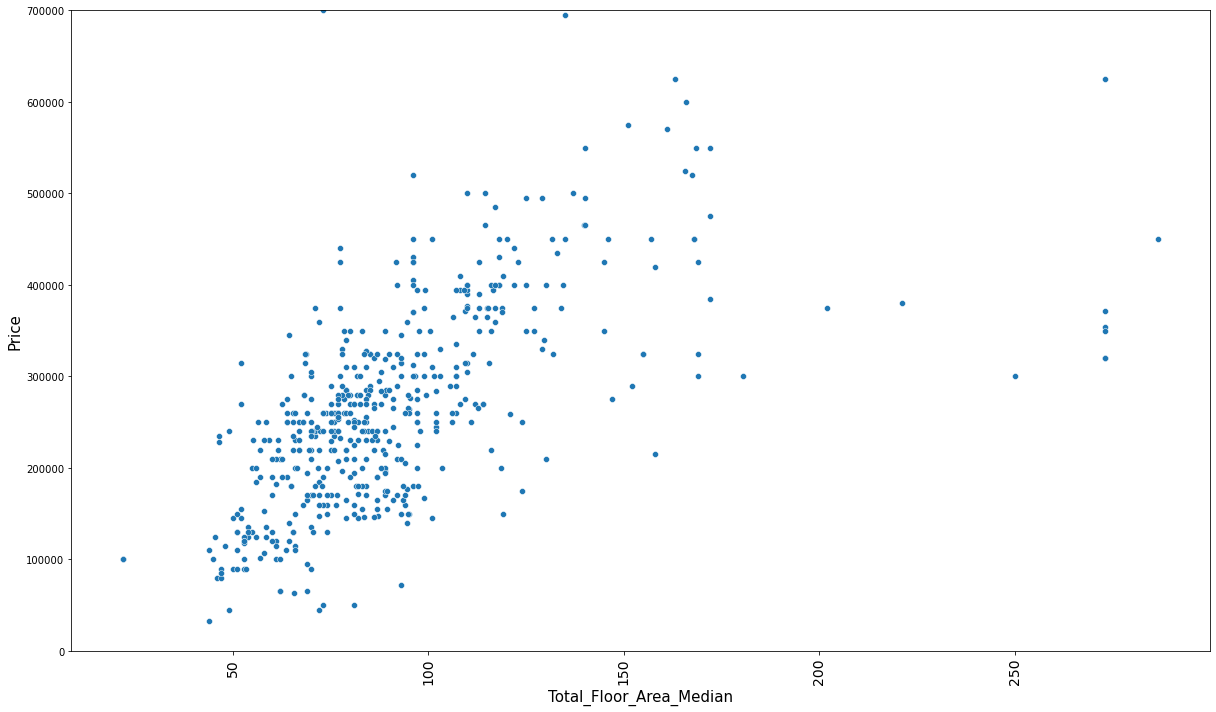

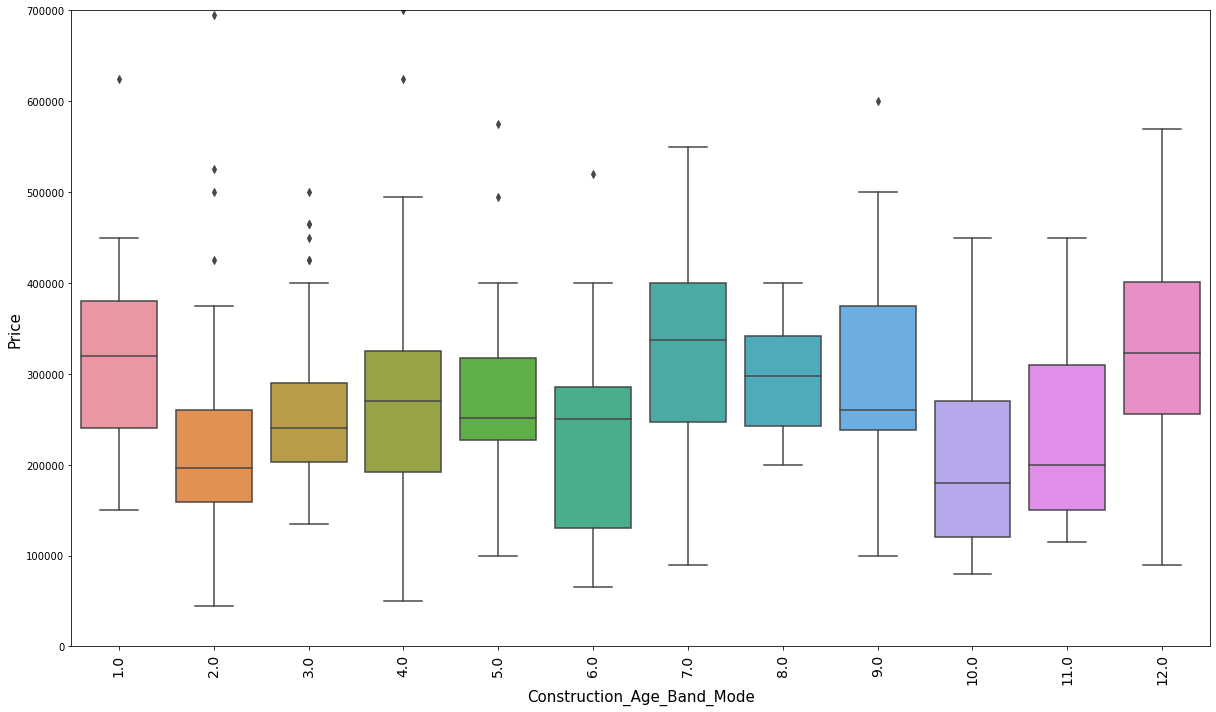

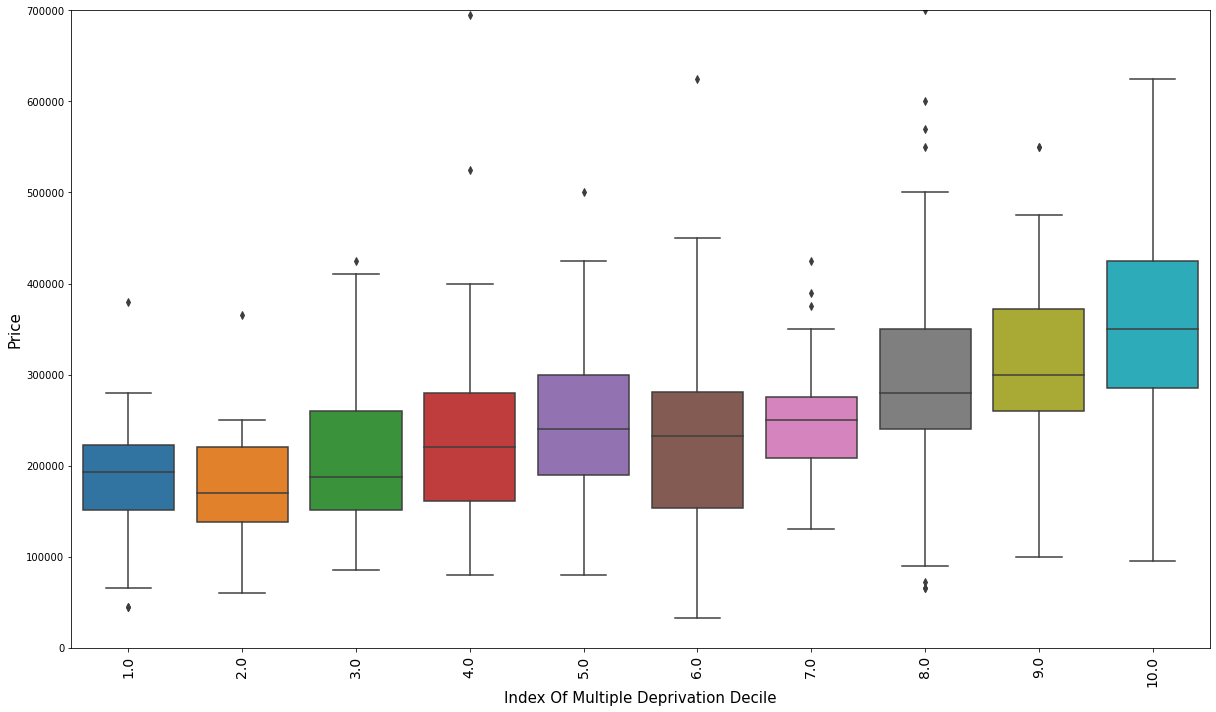

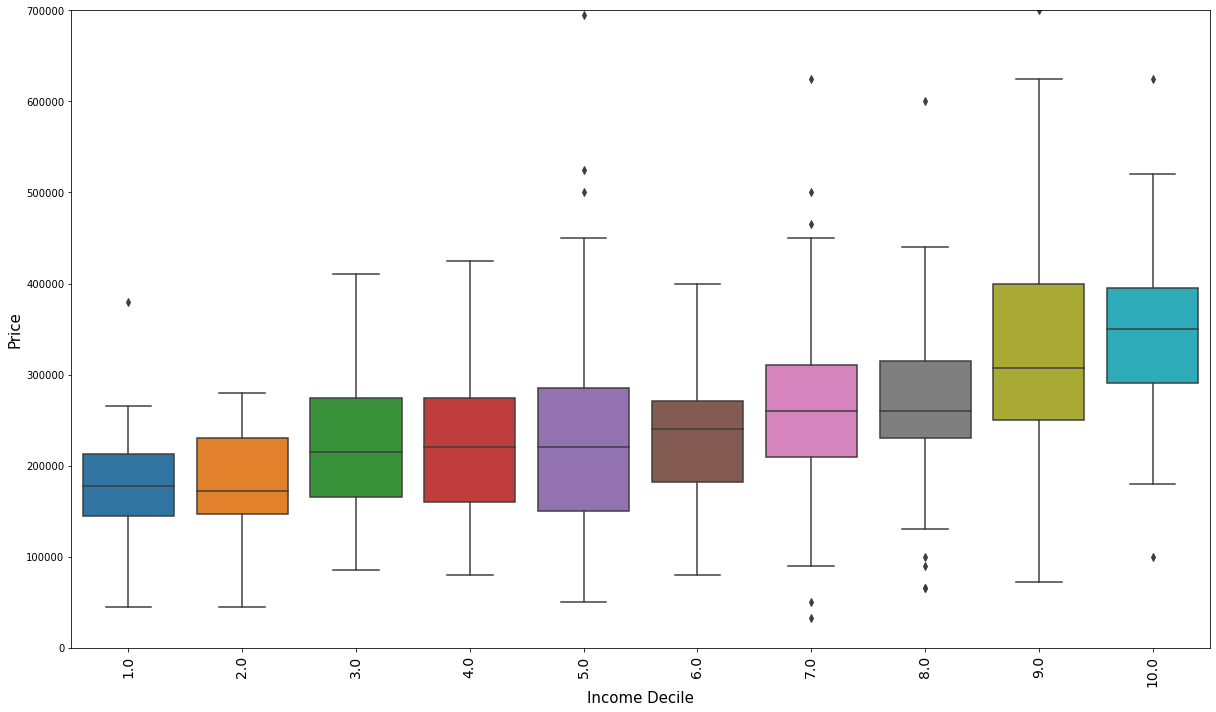

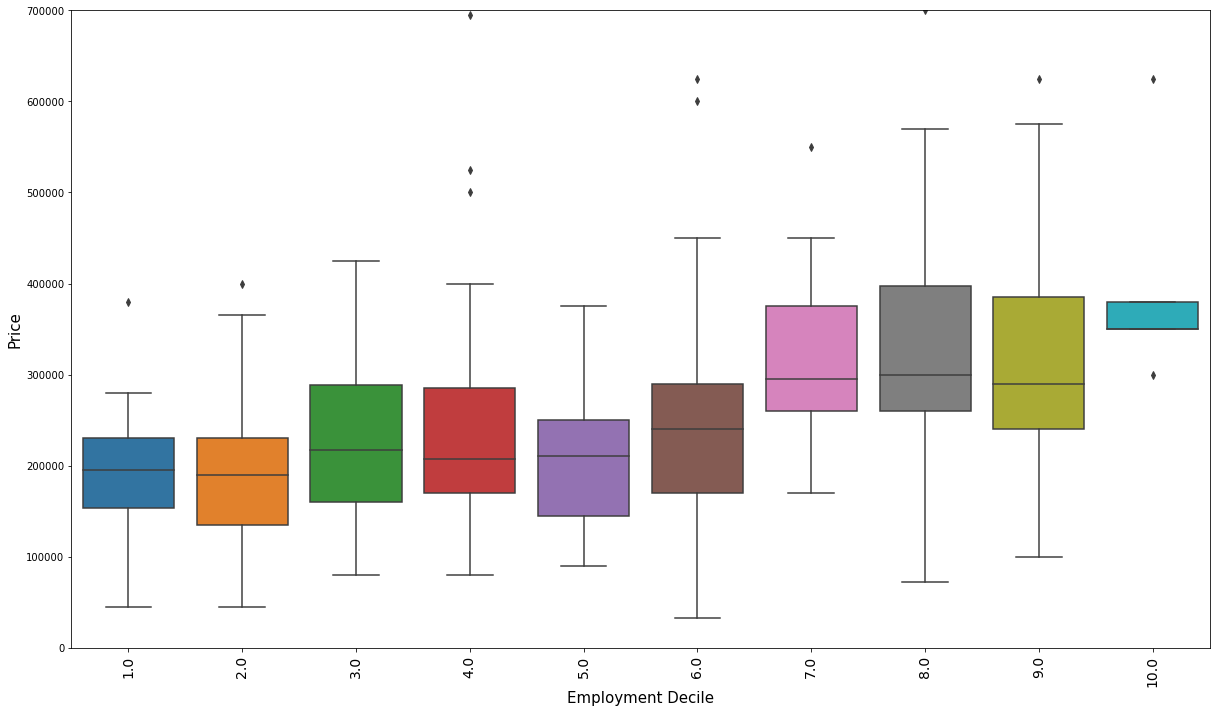

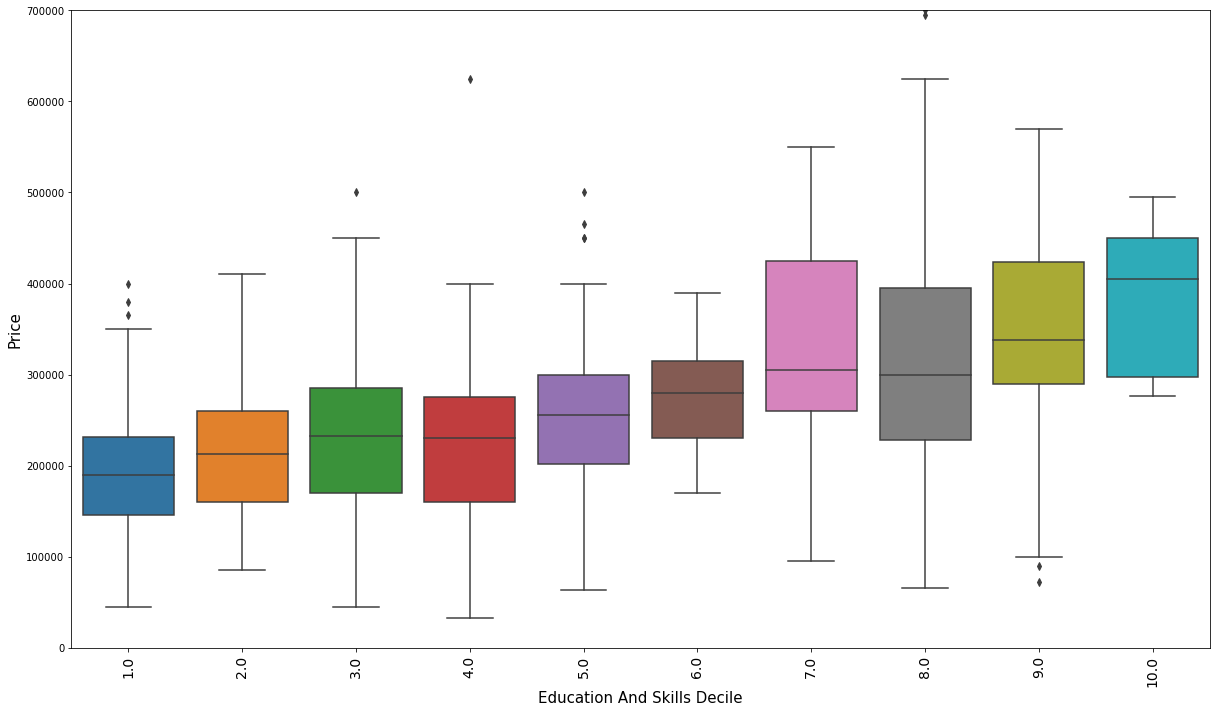

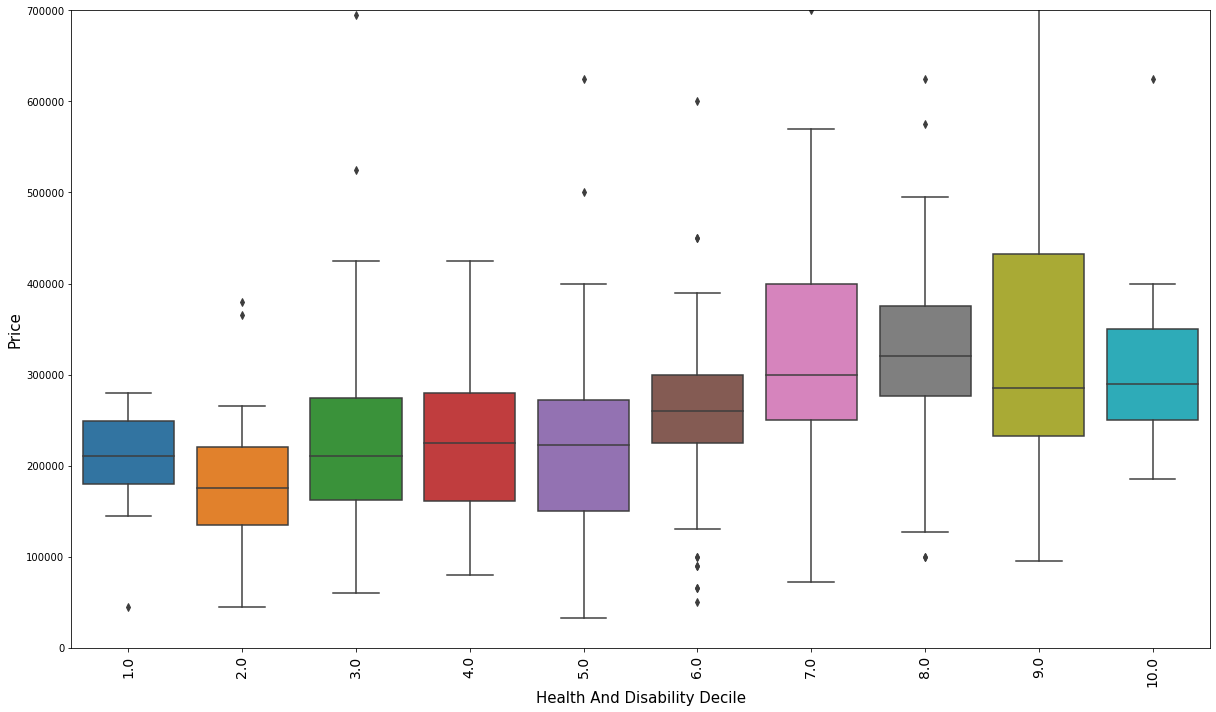

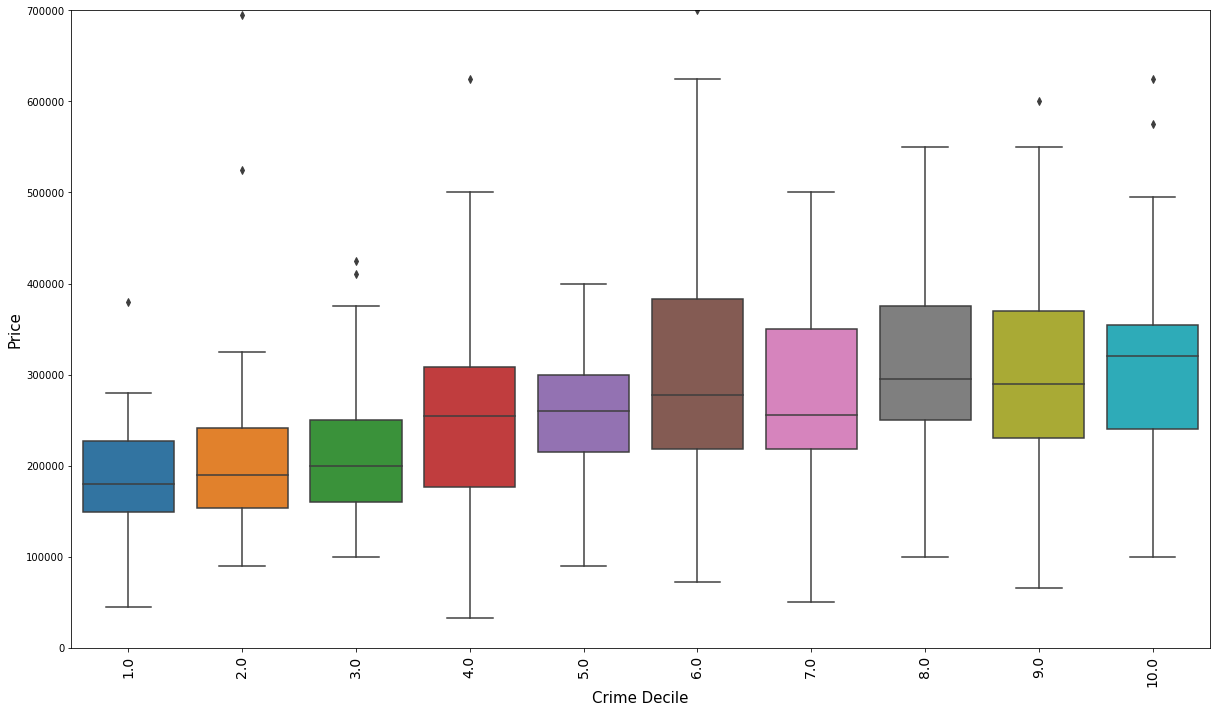

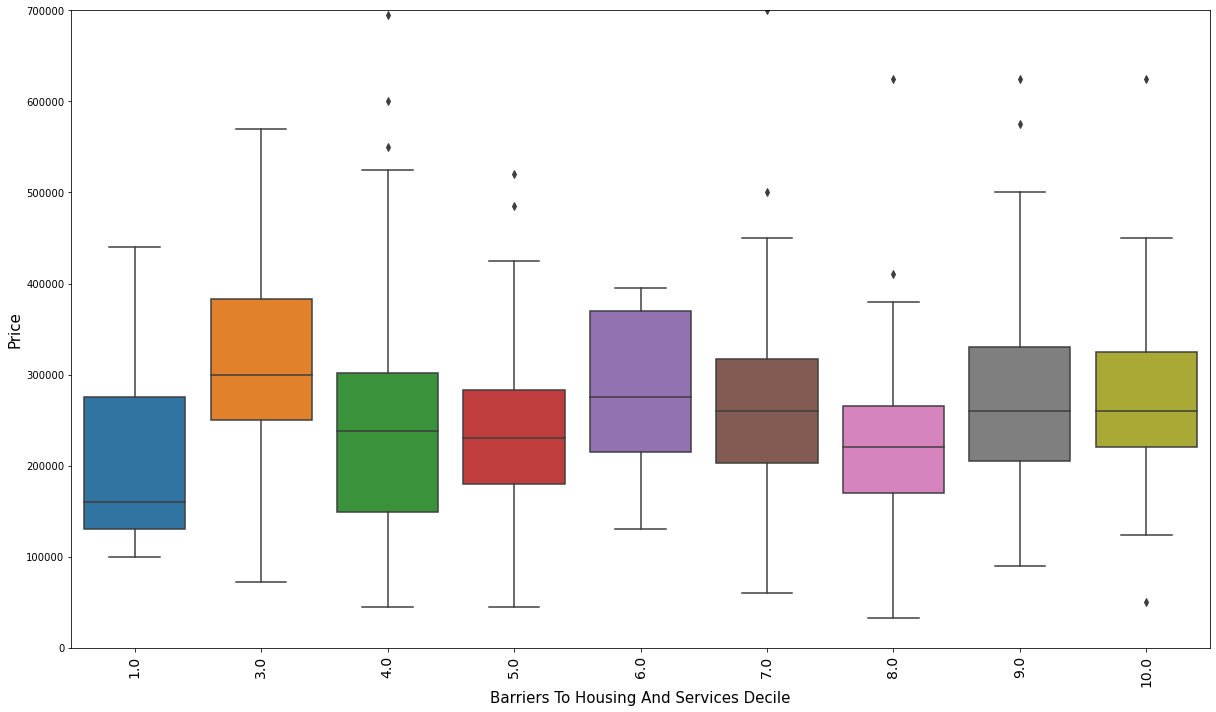

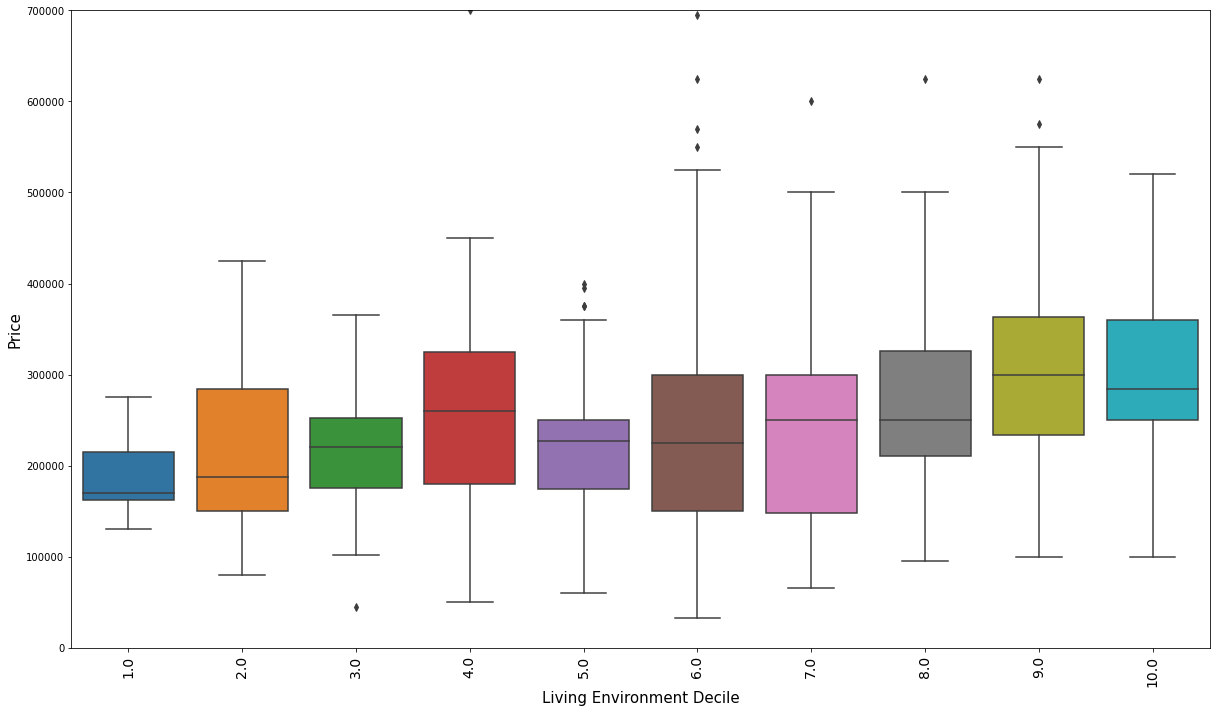

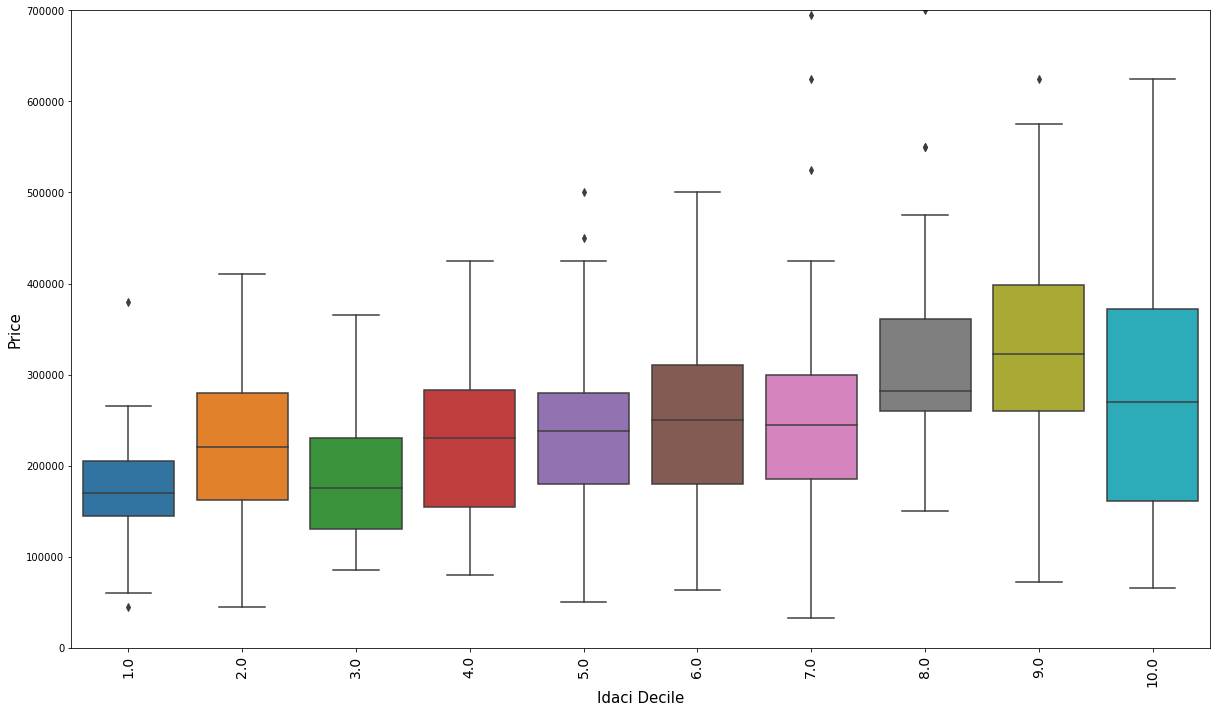

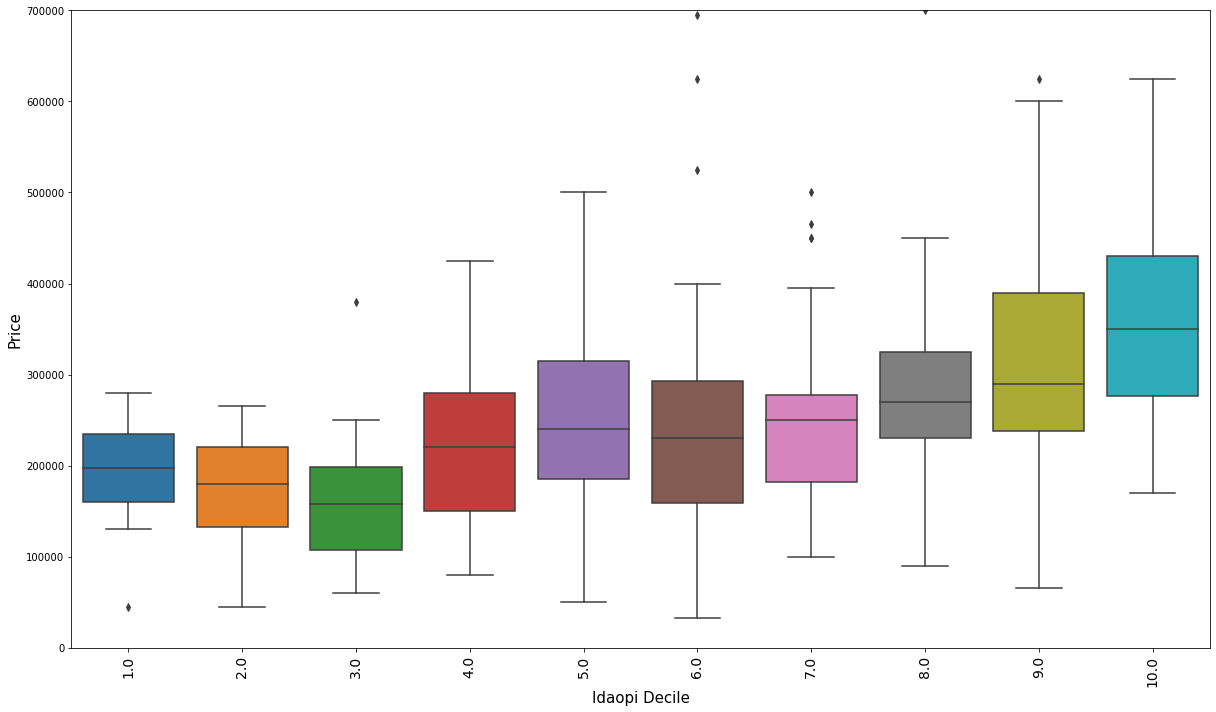

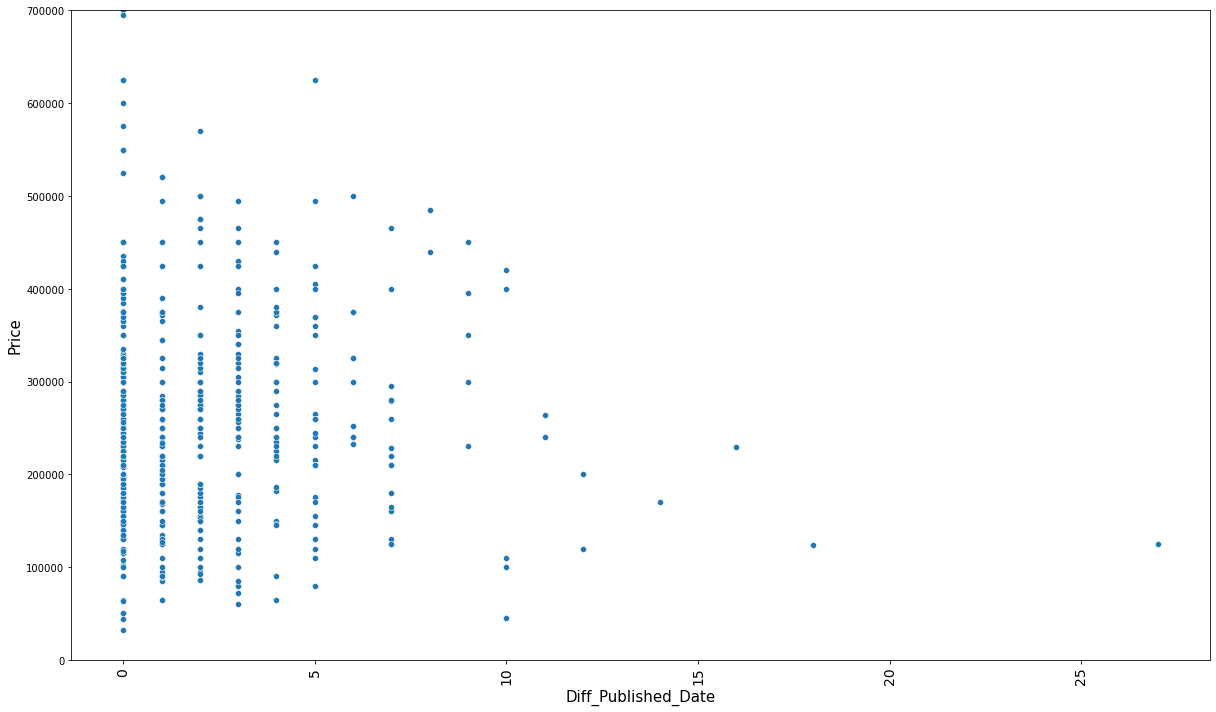

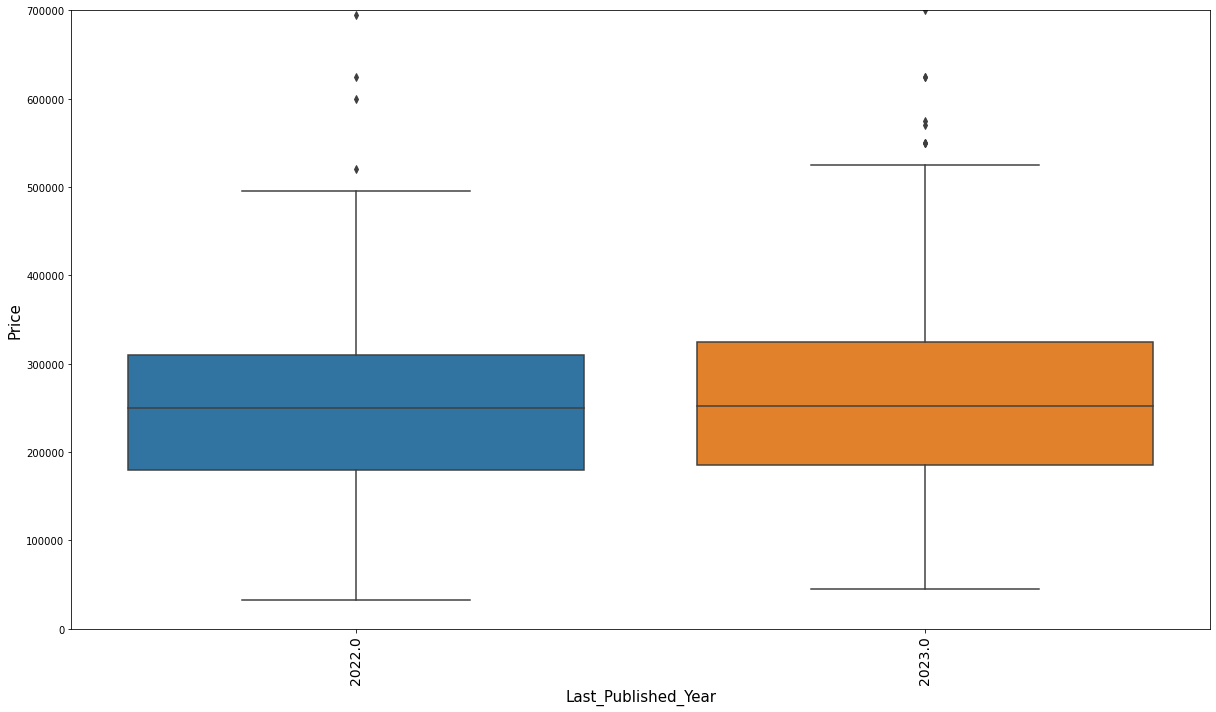

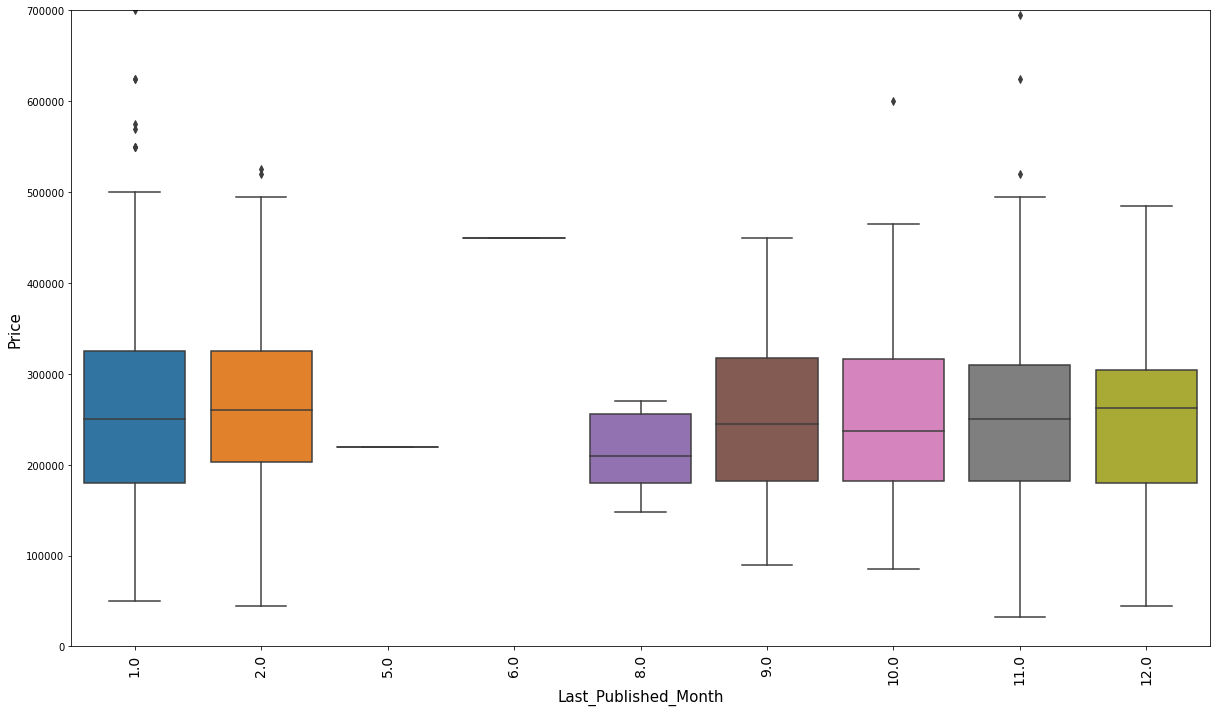

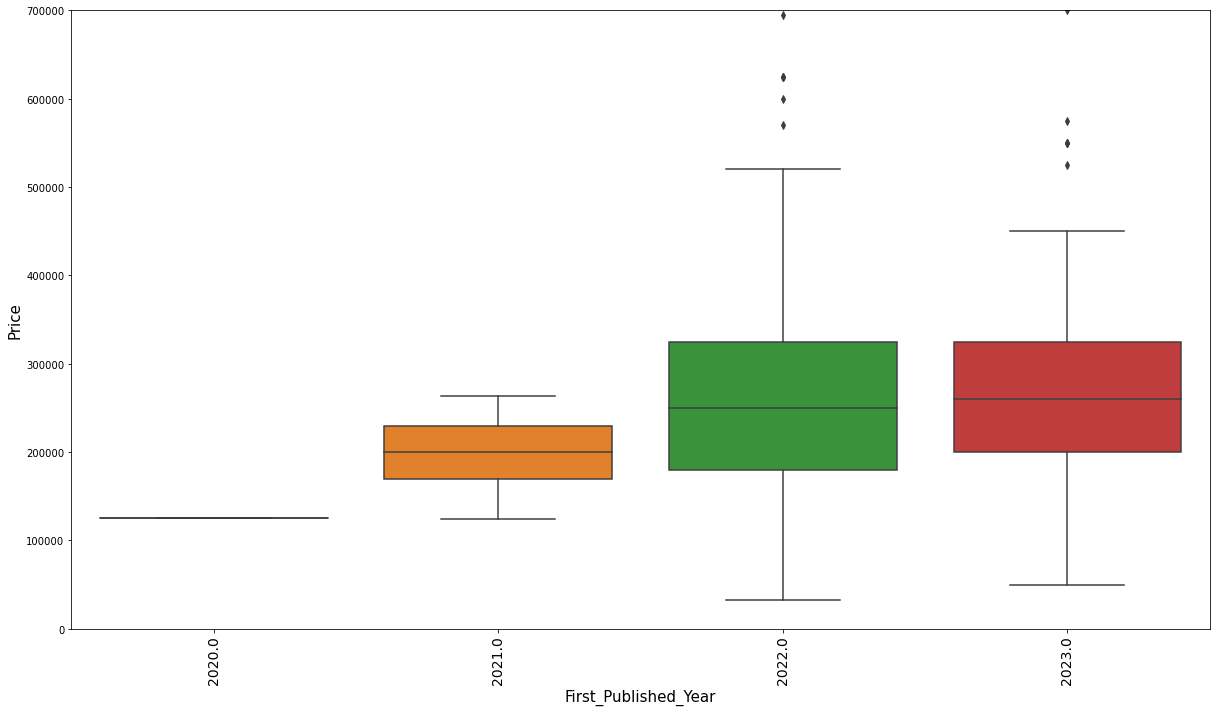

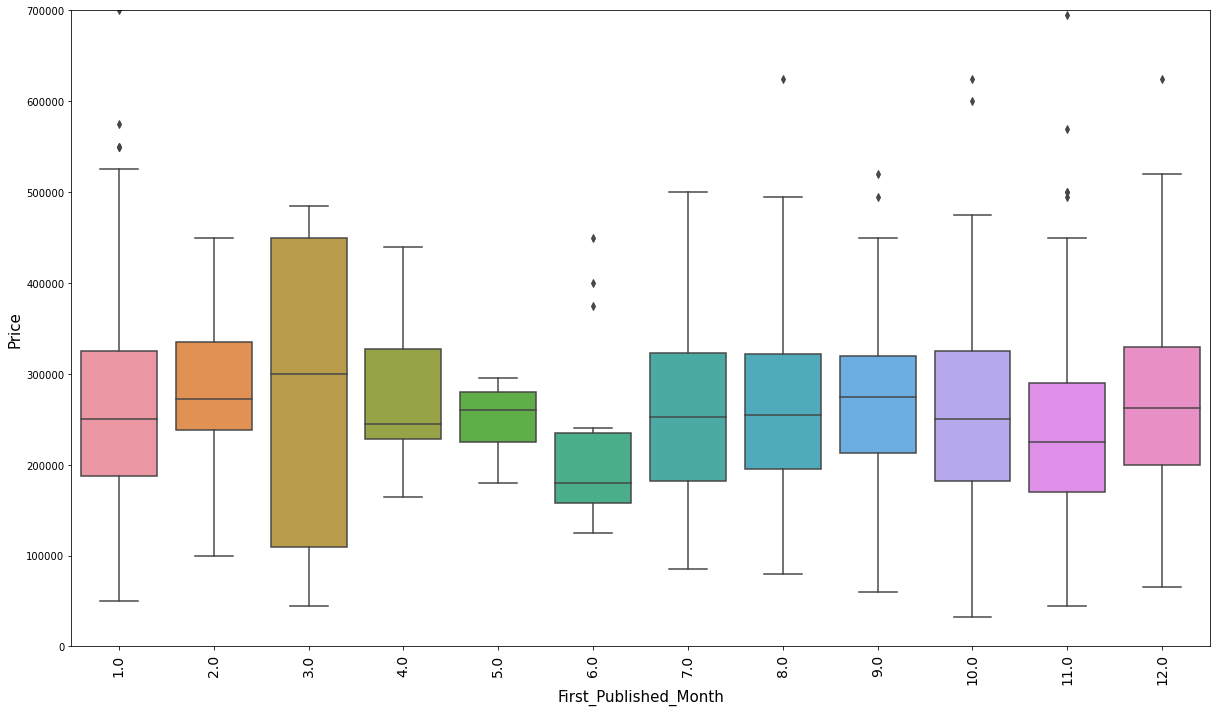

In [13]:
# Create 2D bar plots for numeric variables (box plots for 
# ordered discrete variables and scatter plots for continuous variables)

for col in numeric_cols:
    
    # ignore these columns
    if col in ['latitude', 'longitude', 'price']:
        continue
    
    # continuous variables
    elif col in ['TOTAL_FLOOR_AREA_median', 'diff_published_date']:
        plot_graph(zoopla_df_train[col], zoopla_df_train['price'], kind='scatter', ylim=700000)
    
    # ordered discrete variables
    else:
        if col in ['num_bedrooms', 'num_bathrooms']:
            ylim = 1750000
        elif col in ['CURRENT_ENERGY_RATING_mode', 'POTENTIAL_ENERGY_RATING_mode']:
            ylim = 1000000
        else:
            ylim = 700000
        plot_graph(zoopla_df_train[col], zoopla_df_train['price'].astype(float), kind='box', ylim=ylim)

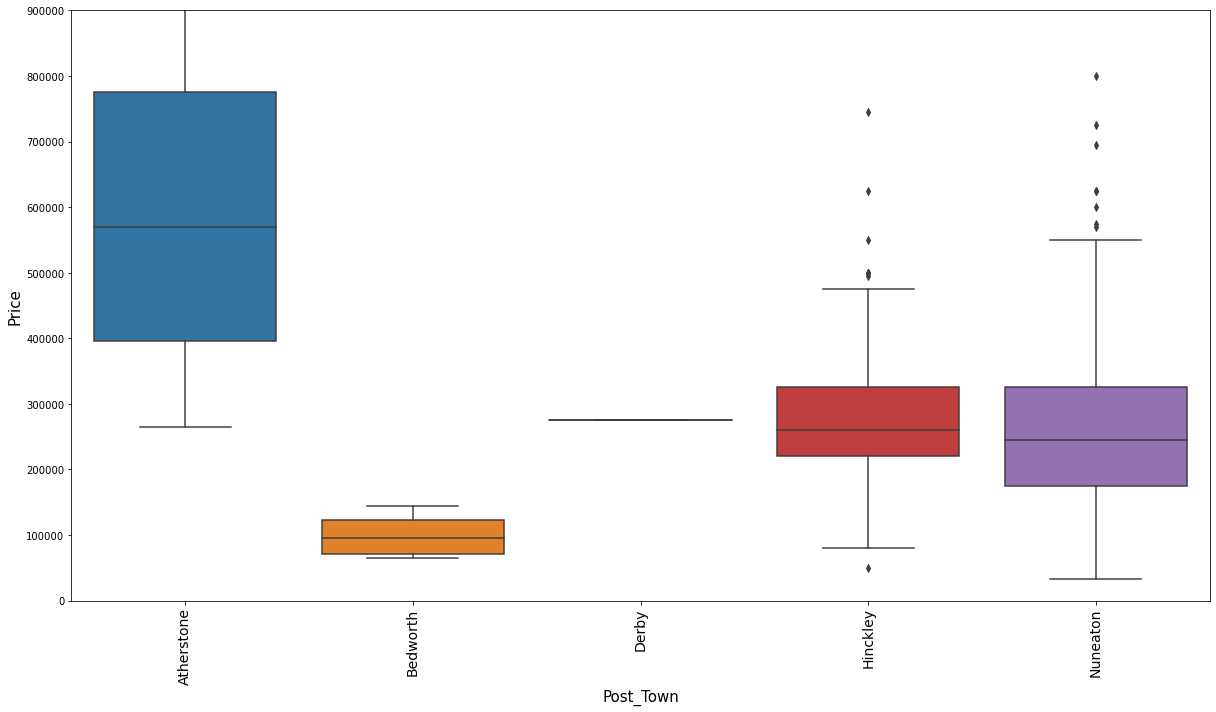

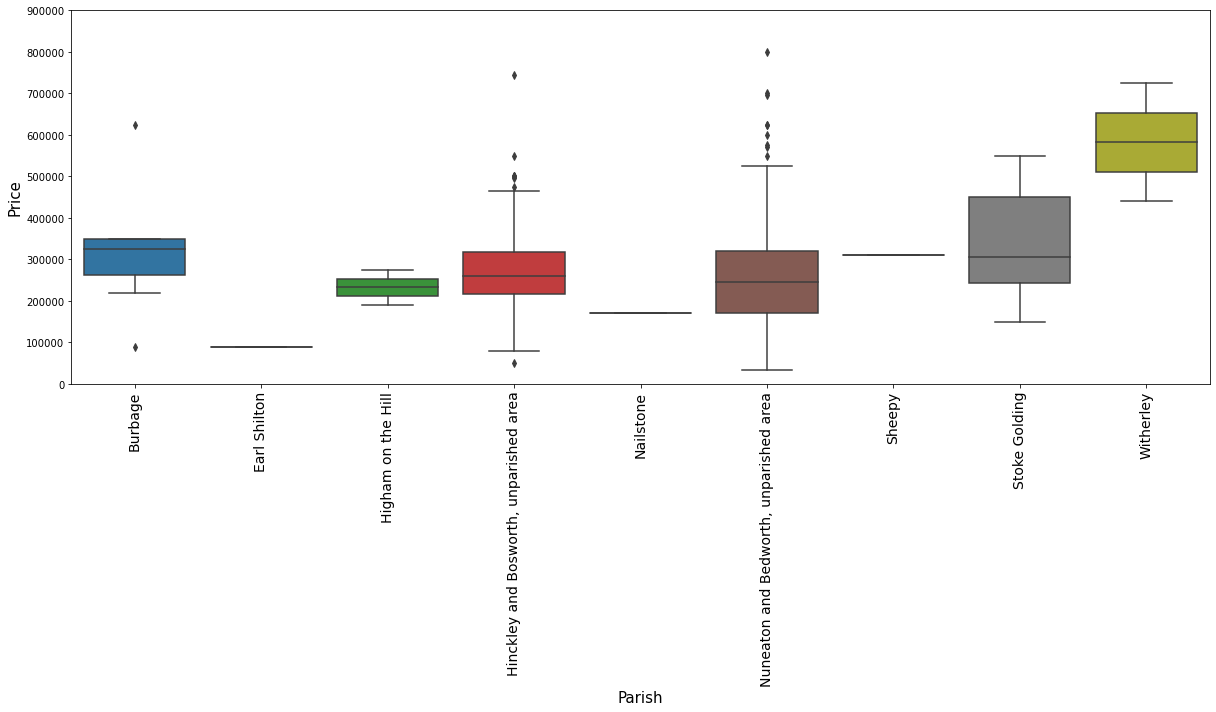

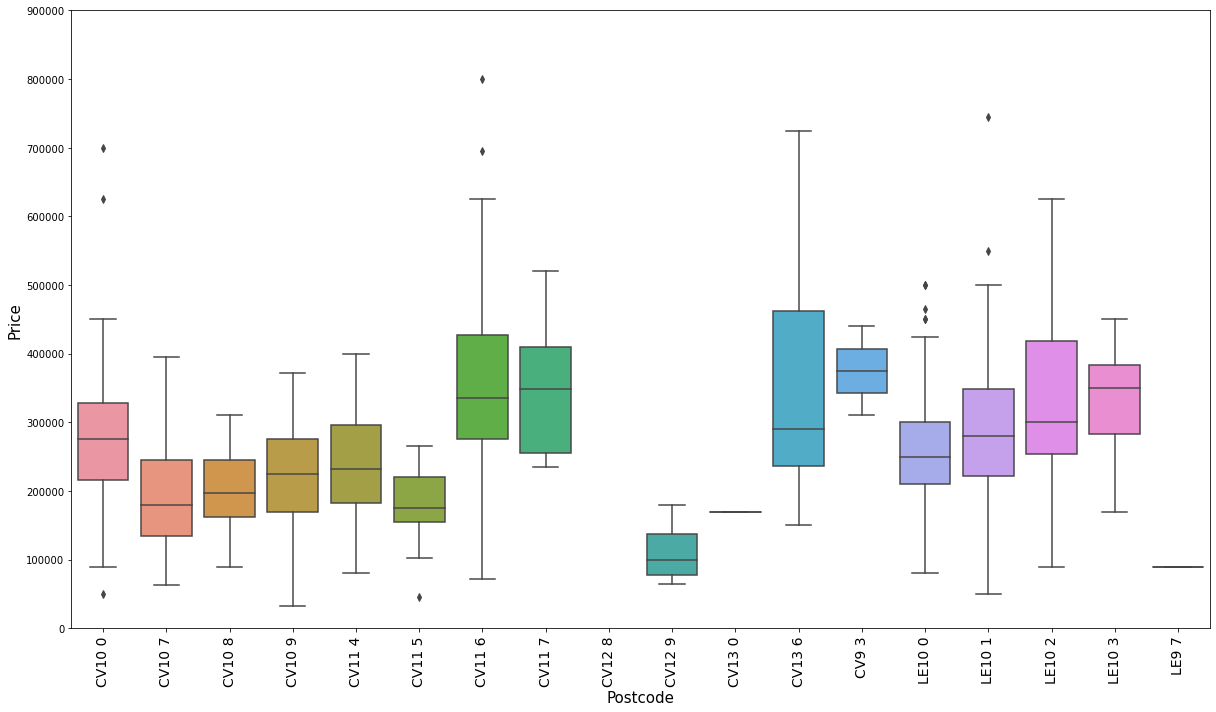

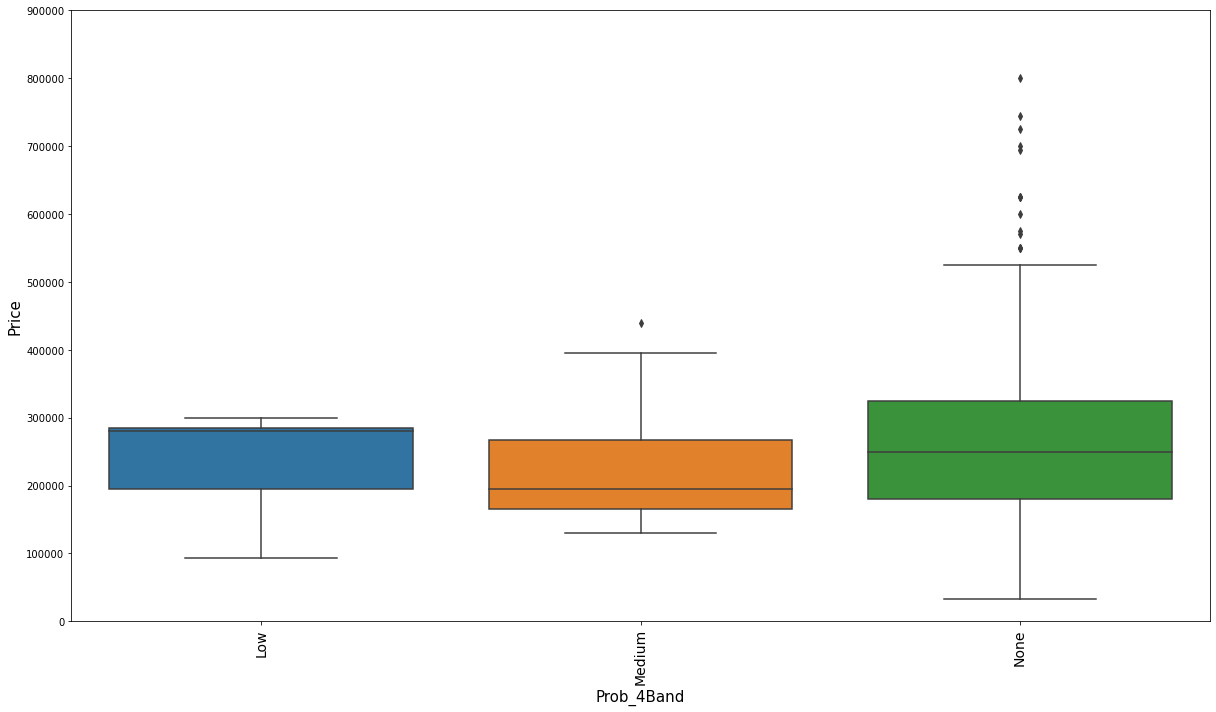

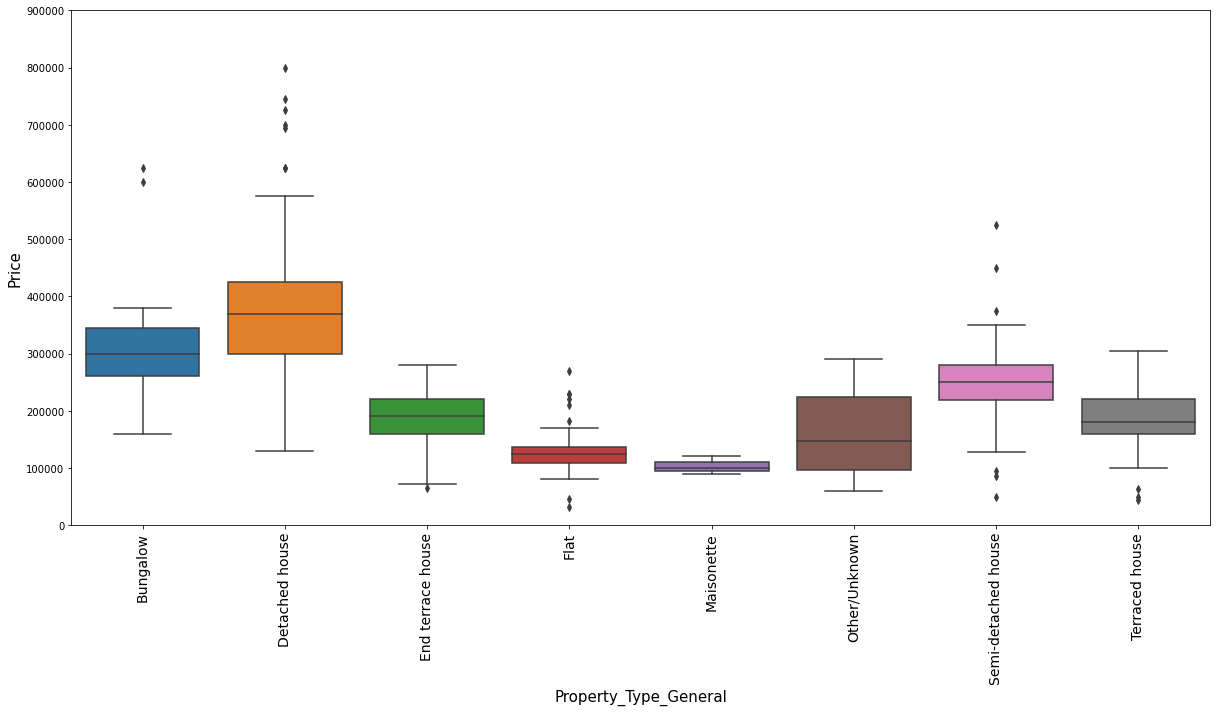

In [22]:
# 2D bar plots for categoric variables
for col in categoric_cols:
    var_order = sorted(zoopla_df_train[col].dropna().unique())
    plot_graph(zoopla_df_train[col], zoopla_df_train['price'].astype(float), 
               kind='box', ylim=900000, var_order=var_order)

In [21]:
display(zoopla_df_train['PROB_4BAND'].value_counts(dropna=False))
display(zoopla_df_train['PROB_4BAND'].fillna('Other/Unknown').value_counts(dropna=False))

None      576
NaN        30
Medium      8
Low         5
Name: PROB_4BAND, dtype: int64

None             576
Other/Unknown     30
Medium             8
Low                5
Name: PROB_4BAND, dtype: int64

Clearly longitude and latitude by themselves are too granular. Let's group these.

### Use K-Means clustering to convert longitudes and latitudes into clusters

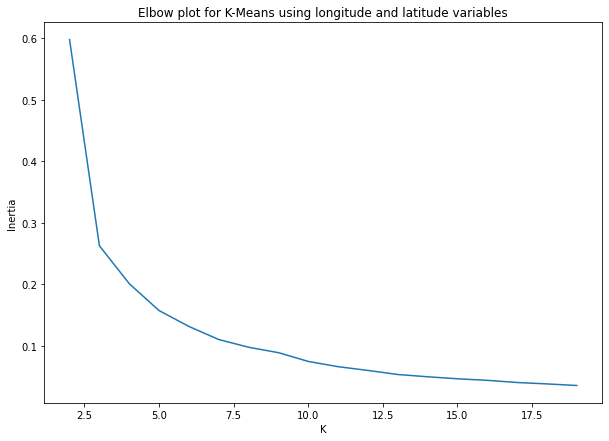

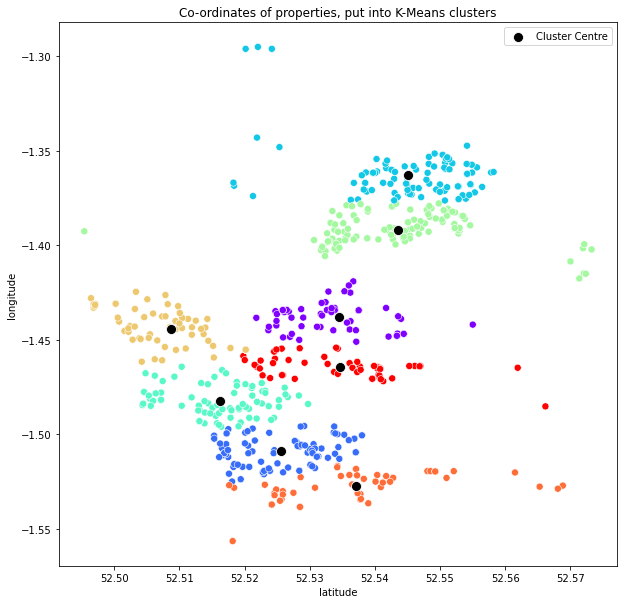

In [78]:
# make inertia plot
kmeans_info = {}
inertia_array = []

for k in range(2, 20):
    kmeans_k = KMeans(k, random_state=40)
    kmeans_k.fit(zoopla_df_train[['latitude', 'longitude']])
    kmeans_info[k] = kmeans_k
    inertia_array.append(kmeans_k.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(2,20), inertia_array)
plt.title('Elbow plot for K-Means using longitude and latitude variables')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()


final_k = 8

plt.figure(figsize=(10, 10))
sns.scatterplot(data=zoopla_df_train, x='latitude', y='longitude', hue=kmeans_info[final_k].labels_, 
                palette='rainbow', s=50, legend=None)
sns.scatterplot(x=kmeans_info[final_k].cluster_centers_[:,0], y=kmeans_info[final_k].cluster_centers_[:,1], 
                color='k', s=100, label='Cluster Centre')
plt.title('Co-ordinates of properties, put into K-Means clusters')
plt.legend(fontsize=10)
plt.show()
